### Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
#откроем файлы и изучим первые 10 строк датасета

visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [5]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [6]:
#изучим общую информацию о файлах

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
#изменим названия столбцов, приведем к общепринятому стилю

visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [10]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [11]:
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [12]:
#преобразуем данные о времени для дальнейших расчетов 

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [16]:
#проверим датасеты на наличие дубликатов

visits.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

In [18]:
costs.duplicated().sum()

0

Итак согласно документации к данным в таблице `visits` 6 столбцов: 

* `User Id` — уникальный идентификатор пользователя
* `Region` — страна пользователя
* `Device` — тип устройства пользователя
* `Channel` — идентификатор источника перехода
* `Session Start` — дата и время начала сессии
* `Session End` — дата и время окончания сессии

Таблица `orders` содержит 3 столбца: 

* `User Id` — уникальный идентификатор пользователя
* `Event Dt` — дата и время покупки
* `Revenue` — сумма заказа

И таблица `costs` также содержит 3 столбца: 

* `dt` — дата проведения рекламной кампании
* `Channel` — идентификатор рекламного источника
* `costs` — расходы на эту кампанию

Изучив исходные данные была проделана работа по предобработке данных:
* Во всех датасетах привели название столбцов к общепринятому, для удобства дальнейшей работы с ними.
* Преобразовали типы данных, в столбцах содержащих данные о дате и времени, в формат для удобства дальнейшей работы в проекте. 
* Изучили наличие пропусков в датафреймах, они отсутствуют. 
* Проверили датасеты на наличие дубликатов, их также не обнаружили. 

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [19]:
#напишем функцию для создания профилей пользователей

def get_profiles(sessions):
    # сортируем сессии по user_id пользователя и дате начала сессии
    # группируем по user_id и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 'channel': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index() 
    )
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца этого посещения
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles

In [20]:
#напишем функцию для подсчёта Retention Rate

def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions 
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) 
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   
        result = result.div(result['cohort_size'], axis = 0)                                                     
        result = result[['cohort_size'] + list(range(horizon_days))]                                            
        result['cohort_size'] = cohort_sizes                                                                    
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

In [21]:
#напишем функцию для подсчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # найдем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    # добавим данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )
    # рассчитаем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # построим таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # посчитаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычислим размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединим таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # разделим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключим все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result
    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    if 'cohort' in dimensions: 
        dimensions = []
    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

In [22]:
#напишем функцию для подсчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [23]:
#напишем функцию для сглаживания данных 

def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [24]:
#напишем функцию для построения графика Retention Rate

def plot_retention(retention, retention_history, horizon):

    plt.figure(figsize=(15, 10))
    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
    # в первой графике строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    # исключаем наложение графиков друг на друга
    plt.tight_layout()
    plt.show()

In [25]:
#напишем функцию для построения графика конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))
    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [26]:
#напишем функцию для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]
    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

#### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [27]:
profiles = get_profiles(visits)
profiles

,user_id,first_ts,channel,dt,month
0,599326,2019-05-07 20:58:57,FaceBoom,2019-05-07,2019-05-01
1,4919697,2019-07-09 12:46:07,FaceBoom,2019-07-09,2019-07-01
2,6085896,2019-10-01 09:58:33,organic,2019-10-01,2019-10-01
3,22593348,2019-08-22 21:35:48,AdNonSense,2019-08-22,2019-08-01
4,31989216,2019-10-02 00:07:44,YRabbit,2019-10-02,2019-10-01
...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,2019-09-28,2019-09-01
150004,999975439887,2019-10-21 00:35:17,organic,2019-10-21,2019-10-01
150005,999976332130,2019-07-23 02:57:06,TipTop,2019-07-23,2019-07-01
150006,999979924135,2019-09-28 21:28:09,MediaTornado,2019-09-28,2019-09-01


In [28]:
min_date = profiles['dt'].min()
min_date

datetime.date(2019, 5, 1)

In [29]:
max_date = profiles['dt'].max()
max_date

datetime.date(2019, 10, 27)

Минимальная дата привлечения пользователей 1 мая 2019, максимальная - 27 октября 2019

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [30]:
#немного изменим функцию для создания профилей, добавим второй аргумент 

def get_profiles_2(sessions, orders):
    # сортируем сессии по id пользователя и дате привлечения
    # группируем по id и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца этого посещения
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    # добавляем признак платящих пользователей
    profiles['payer'] =  profiles['user_id'].isin(orders['user_id'].unique())

    return profiles

In [31]:
profiles_2 = get_profiles_2(visits, orders)

In [32]:
prof_country = profiles_2.groupby('region').agg({'user_id': 'count', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
prof_country['payer'] = round(prof_country['payer'] * 100, 1)
prof_country

,user_id,payer
region,,
United States,100002,6.9
Germany,14981,4.1
UK,17575,4.0
France,17450,3.8


Больше всего пользователей приходят из USA, USA также и лидер по количеству платящих пользователей. 
Меньше всего пользователей из Германии, но количество платящих пользователей превосходит Англию и Францию. 
Самая меньшая доля платящих пользователей во Франции.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [33]:
profiles_3 = get_profiles_2(visits, orders)

In [34]:
prof_device = profiles_3.groupby('device').agg({'user_id': 'count', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
prof_device['payer'] = round(prof_device['payer']*100, 1)
prof_device

,user_id,payer
device,,
Mac,30042,6.4
iPhone,54479,6.2
Android,35032,5.9
PC,30455,5.0


Больше всего пользователей предпочитают iPhone, доля платящих пользователей у Mac и iPhone в лидерах среди всех девайсов. Самое маленькое количество пользователей и доля платящих у PC. 

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [35]:
profiles_4 = get_profiles_2(visits, orders)

In [36]:
prof_channel = profiles_4.groupby('channel').agg({'user_id': 'count', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
prof_channel['payer'] = round(prof_channel['payer']*100, 1)
prof_channel

,user_id,payer
channel,,
FaceBoom,29144,12.2
AdNonSense,3880,11.3
lambdaMediaAds,2149,10.5
TipTop,19561,9.6
RocketSuperAds,4448,7.9
WahooNetBanner,8553,5.3
YRabbit,4312,3.8
MediaTornado,4364,3.6
LeapBob,8553,3.1


В лидерах каналы, из которых пришло больше всего платящих пользователей, FaceBoom, AdNonSense, LambdaMediaAds. Последнюю строчку по количеству привлеченых платящих пользователей занимает organic. 

Итак, в ходе исследования мы выявили, что минимальная дата привлечения пользователей 1 мая 2019, максимальная - 27 октября 2019. Больше всего пользователей живут в USA, могут пользоваться iPhone и приходят не через каналы трафика, а являются "органическими". Большая доля платящих также живут в USA, пользуются Mac и iPhone и приходят через каналы FaceBoom и TipTop. В самую меньшую долю платяхщих попадают пользователи из Франции. Те кто используют PC. Также те, кто приходит не через каналы трафика, а перешли в приложение самостоятельно (organic).


### Маркетинг

#### Посчитаем общую сумму расходов на маркетинг. 

In [37]:
total_sum = costs['costs'].sum() 
round(total_sum)

105497

Общая сумма расходов на маркетинг составляет 105497

#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [38]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Лидеры по тратам являются источники TipTop (54751), FaceBoom (32445). Меньше всего средств потратили на YRabbit (944).

#### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

In [39]:
#добавим столбцы с отображением месяца и недели в датасет costs

costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64[W]')
costs

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,2019-05-01,2019-04-25
1,2019-05-02,FaceBoom,78.1,2019-05-01,2019-05-02
2,2019-05-03,FaceBoom,85.8,2019-05-01,2019-05-02
3,2019-05-04,FaceBoom,136.4,2019-05-01,2019-05-02
4,2019-05-05,FaceBoom,122.1,2019-05-01,2019-05-02
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,2019-10-01,2019-10-17
1796,2019-10-24,lambdaMediaAds,6.4,2019-10-01,2019-10-24
1797,2019-10-25,lambdaMediaAds,8.8,2019-10-01,2019-10-24
1798,2019-10-26,lambdaMediaAds,8.8,2019-10-01,2019-10-24


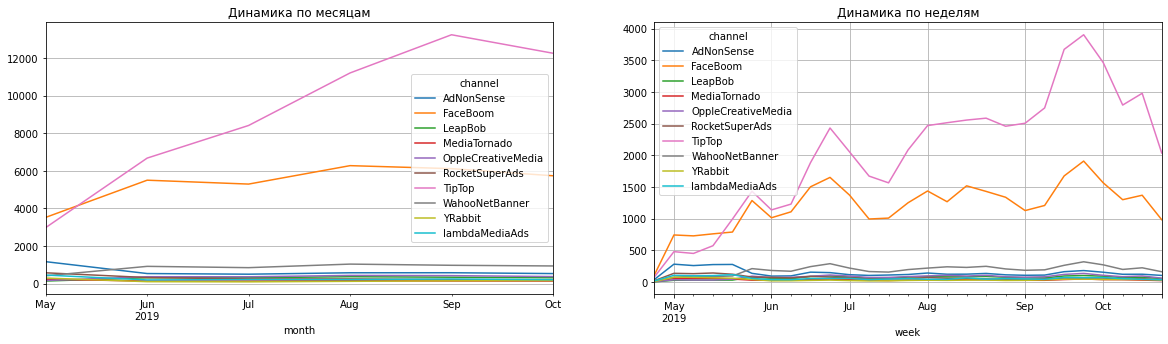

In [40]:
#построим графики динамики изменения расходов по времени

plt.figure(figsize=(20, 5)) 

costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
).plot(
    # строим график динамики по месяцам в перворм графике
    grid=True, ax=plt.subplot(1, 2, 1)
)
plt.title('Динамика по месяцам')

costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
).plot(
    # во второй ячейке строим график динамики по неделям
    grid=True, ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика по неделям')
plt.show() 

У канала TipTop пик расходов пришелся на сентябрь, у FaceBoom также в сентябре пик, но и в июне были расходы близкие к пиковому сентябрю. 

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [41]:
# дополним функцию get_profiles для расчета CAC
# добавим параметр ad_costs — траты на рекламу
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по id пользователя и дате привлечения
    # группируем по id и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца этого посещения
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [42]:
profiles_5 = get_profiles(visits, orders, costs)
profiles_5

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


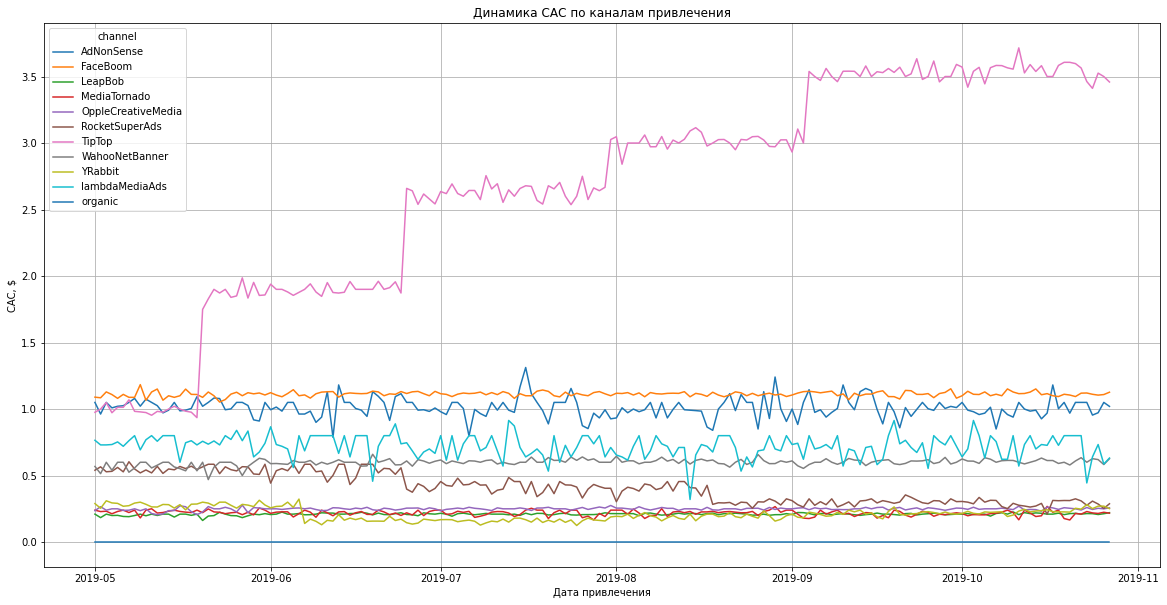

In [43]:
# строим график истории изменений CAC по каналам привлечения

profiles_5.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(20, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show();

In [44]:
# посчитаем средний CAC для каждого канала

mean_cac = profiles_5.pivot_table(
    index='channel', values='acquisition_cost', aggfunc={'acquisition_cost': 'mean'}).query('channel != "organic"')
mean_cac['acquisition_cost'] = round(mean_cac['acquisition_cost'], 2)
mean_cac

,acquisition_cost
channel,
AdNonSense,1.01
FaceBoom,1.11
LeapBob,0.21
MediaTornado,0.22
OppleCreativeMedia,0.25
RocketSuperAds,0.41
TipTop,2.80
WahooNetBanner,0.60
YRabbit,0.22


Стоимость привлечения «органических» пользователей равна нулю, потому что они перешли в приложение самостоятельно, а не благодаря рекламе, что логично. 
У канала TipTop примерно раз в месяц увеличивался CAC в среднем на 1 или 0,5 доллара. Максимально сумма достигла с сентября 3,5 долларов. У остальных каналов в среднем не превышало расходы привлечение одного пользователя 1$. 
По каналам средний показатель cac выше всего у канала TipTop(2.8), меньше всего у LeapBob(0,21), MediaTornado и YRabbit(0,22)

### Оцените окупаемость рекламы

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [45]:
# отфильтруем пользователей с органическим трафиком

profiles_5 = profiles_5.query('channel != "organic"')

In [46]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_5, orders, datetime(2019, 11, 1).date(), 14
)

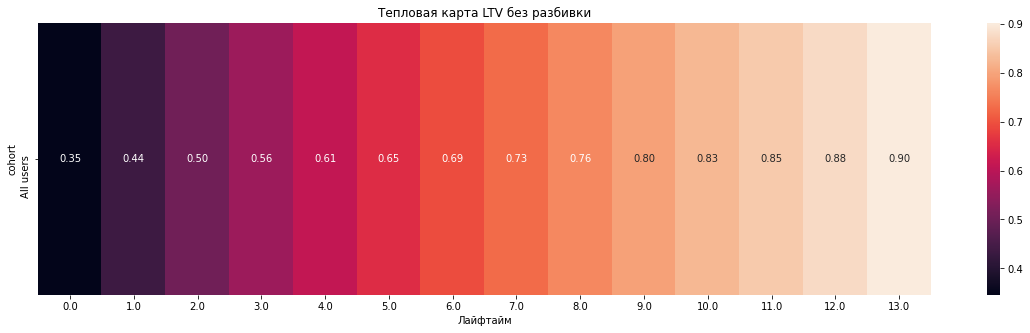

In [47]:
# построим тепловую карту ltv

plt.figure(figsize=(20, 5)) 
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

недельный LTV пользователей, зарегистрировавшихся в конце октября, составил 90 центов.

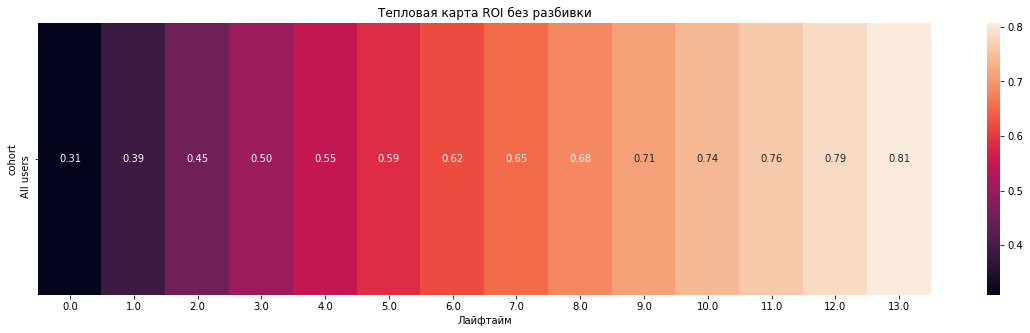

In [48]:
# построим тепловую карту roi

plt.figure(figsize=(20, 5)) 
sns.heatmap(roi.drop(columns=['cohort_size', 'cac']), annot=True, fmt='.2f')
plt.title('Тепловая карта ROI без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

Судя по тепловой карте реклама не окупилась вовсе

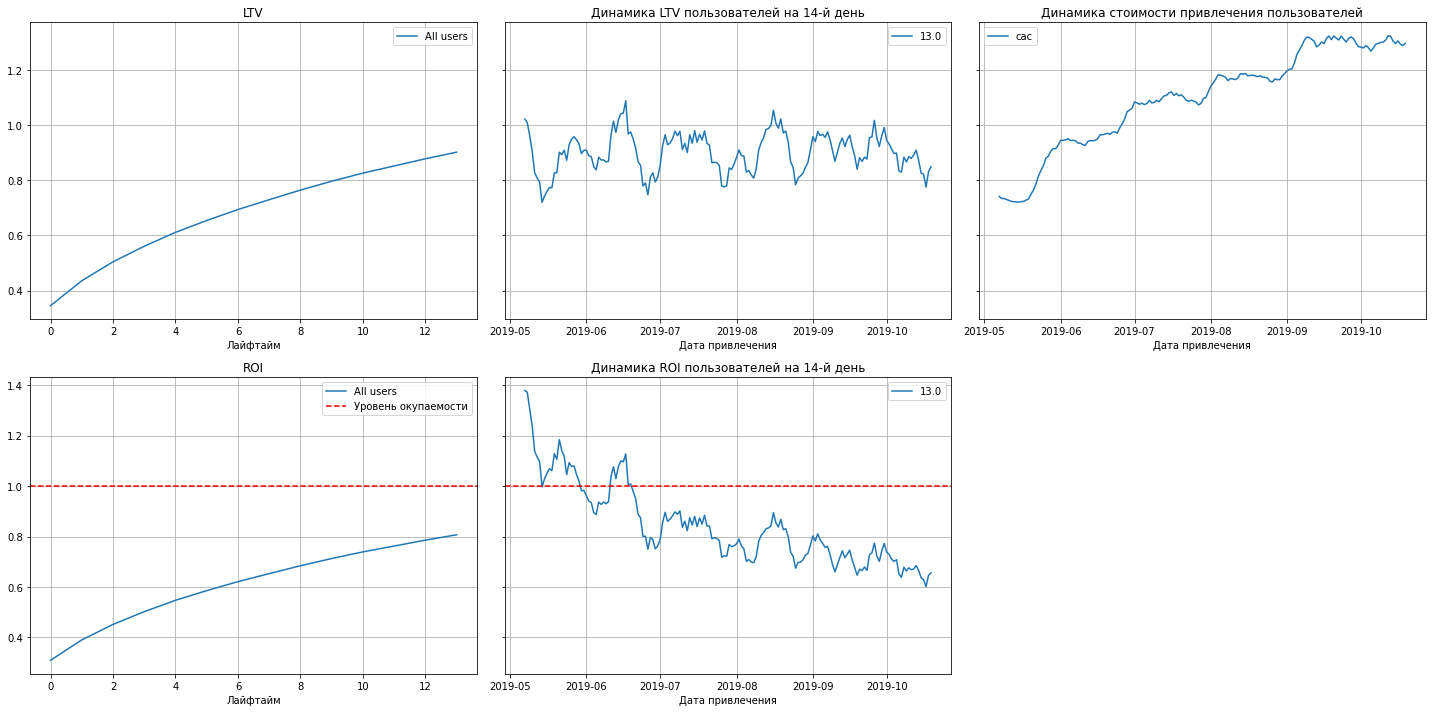

In [49]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

На общем графике динамики ltv, видим плавный рост, что логично для данного показателя 
Стоимость привлечения одного клиента резко возрасла к концу июня и имеет плавный рост в оставшиеся месяца анализа 
За 14 дней реклама не окупилась вовсе
С Июля реклама перестала окупаться, окупалась только в мае и июне 

#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

In [50]:
profiles_2 = profiles_2.query('channel != "organic"')

In [51]:
# рассчитаем коэффициент удержания

retention_raw, retention, retention_history = get_retention(
    profiles_2, visits, datetime(2019, 11, 1).date(), 14
)

retention

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,81334,1.0,0.176876,0.086594,0.051823,0.033504,0.024701,0.018651,0.014188,0.011729,0.009541,0.007488,0.006393,0.006012,0.004709
True,7310,1.0,0.380985,0.293023,0.235568,0.210260,0.191245,0.166758,0.156908,0.145144,0.136389,0.135021,0.121888,0.118741,0.104925


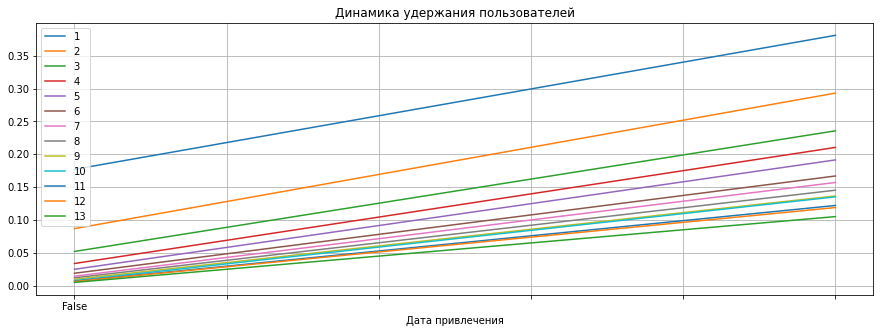

In [52]:
# строим график удержания в динамике

report = retention.drop(columns=['cohort_size', 0])

report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Дата привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

Динамика удержания в первые дни выше, что логично. 

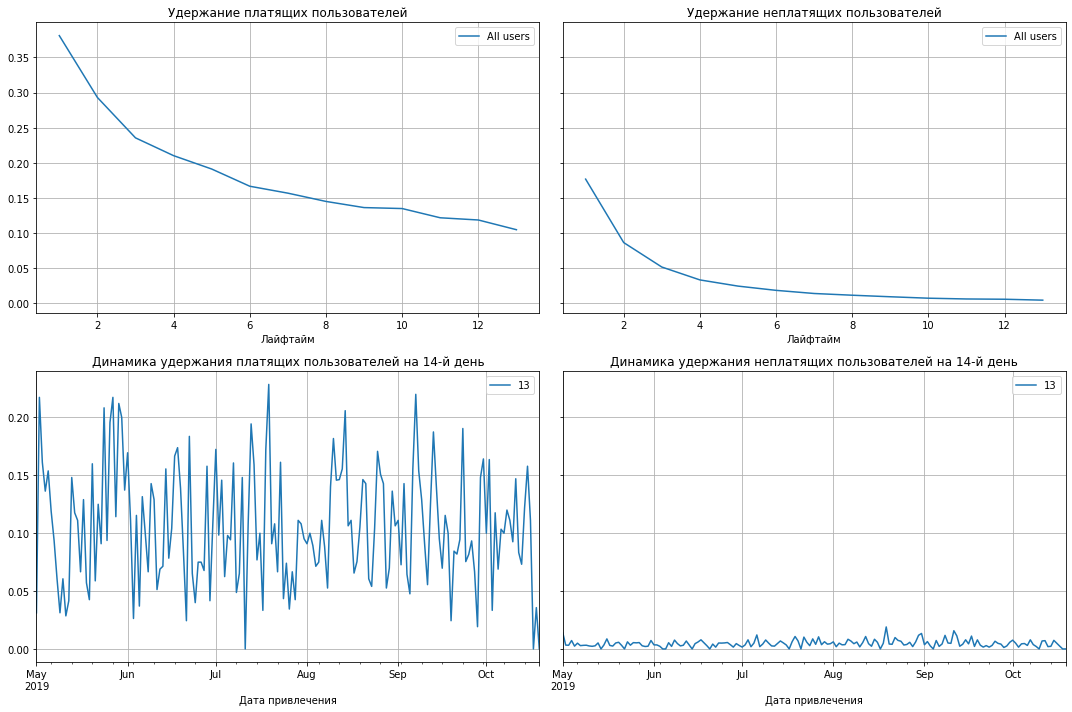

In [53]:
plot_retention(retention, retention_history, 14)

Удержание неплатящих на графиках истории изменений ниже, чем удержание платящих. Впрочем, как и следовало ожидать.

In [54]:
profiles = profiles.query('channel != "organic"')

In [55]:
# расчитаем конверсию пользователей 

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)
conversion

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.058752,0.066321,0.069999,0.072571,0.0745,0.075775,0.076745,0.077591,0.078291,0.078945,0.079362,0.079678,0.079904,0.080197


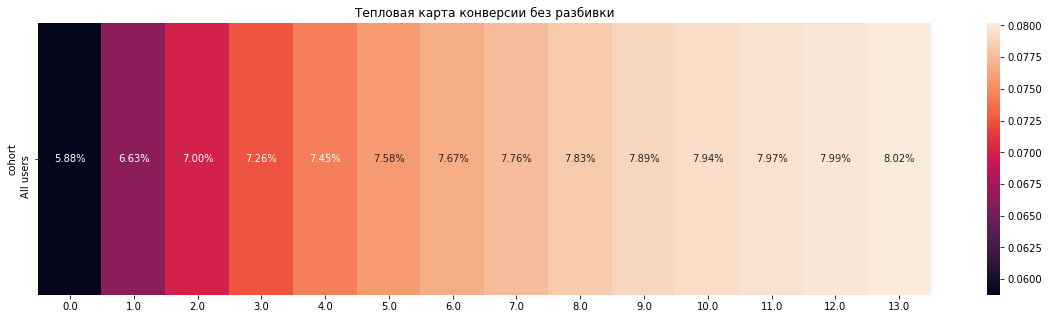

In [56]:
# строим хитмэп по таблице конверсии
plt.figure(figsize=(20, 5)) 
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии без разбивки')
plt.show() 

Конверсия растет от 5.88% до 8,02 на 14 день

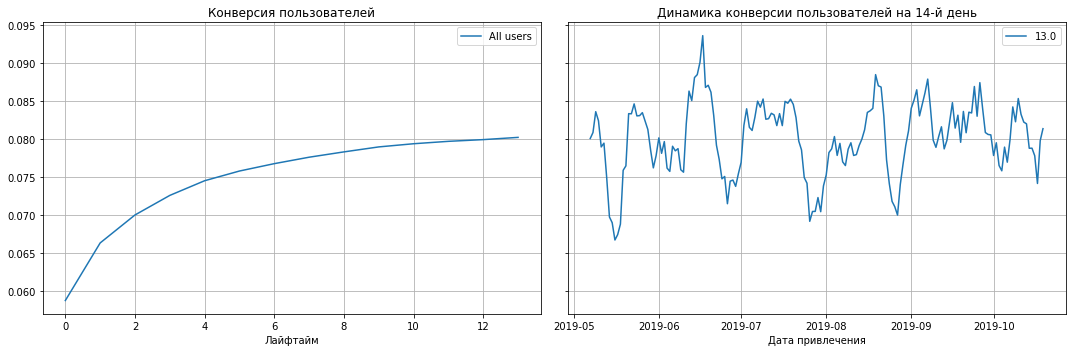

In [57]:
plot_conversion(conversion, conversion_history, 14) 

Конверсия 14 дней после первого дня плавно идет в рост. Конвертация пользователей по месяцам идет с равными спадами и взлетами каждые две недели.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [58]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_5, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

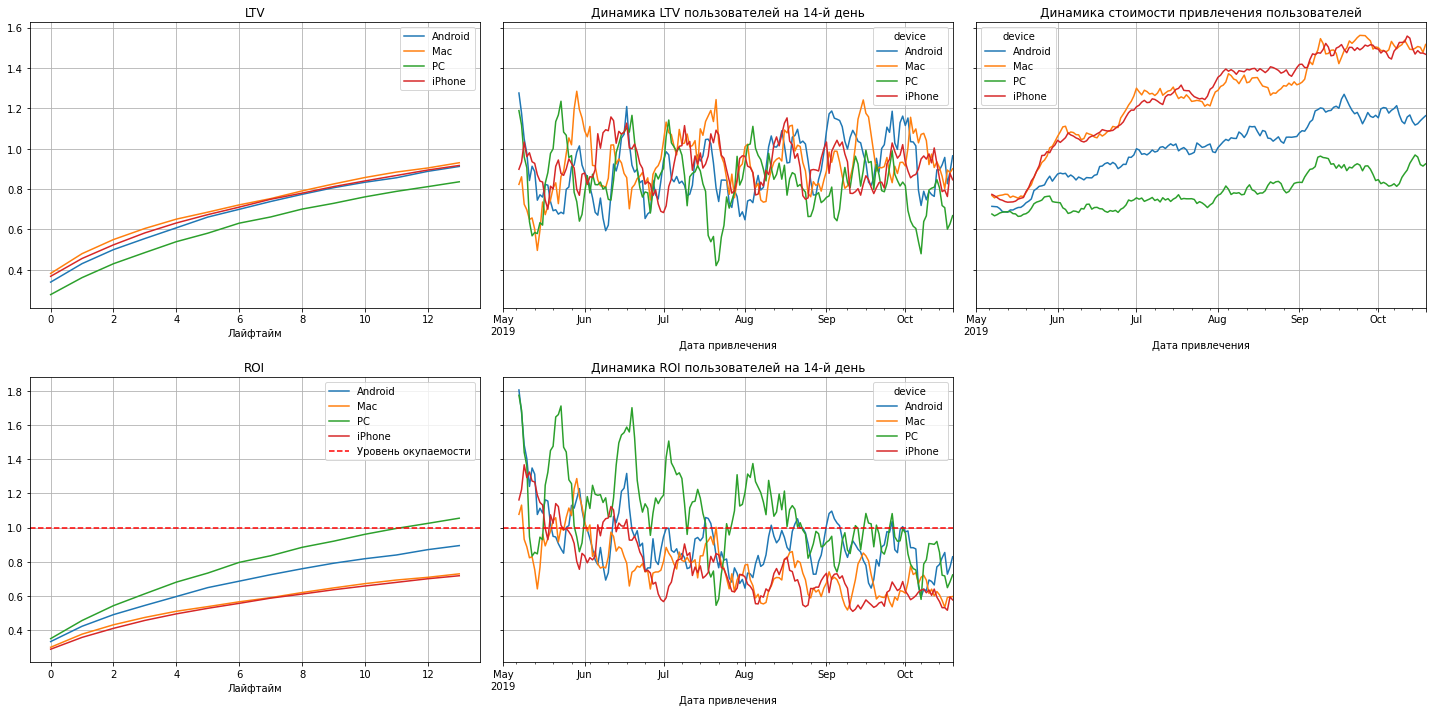

In [59]:
# построим графики динамики ltv, cac и roi с разбивкой по устройствам

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

Судя по графику самый высокий ltv у пользователей с устройствами Mac, iPhone и Android. Пользователи с утройством PC приносят менеше всего всего выручки приложению Procrastinate Pro+
На одинадцатый день вышла в окупаемость реклама для пользователей с утстройством PC. Реклама для остальных устройств не окупилась вовсе.
Графики динамики ltv, cac и roi показывают нам что стоимость привлечения пользователей резко возрасла в июне для всех устройств, крроме PC, PC показывает плавный рост. Самая дорогая стоимость привлечения на протяжении всего времени у Mac и  iPhone, с тем что они не окупаются совсем. Окупаемость в динамике также идет постепенно на спади после июня. Все устройства не окупаются , чего не можем сказать о PC, окупаемость которого прослеживается на протяжении всего срока анализа и имеет самую низкую стоимость привлечения пользователей от 0,7 до 1.

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [60]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_5, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

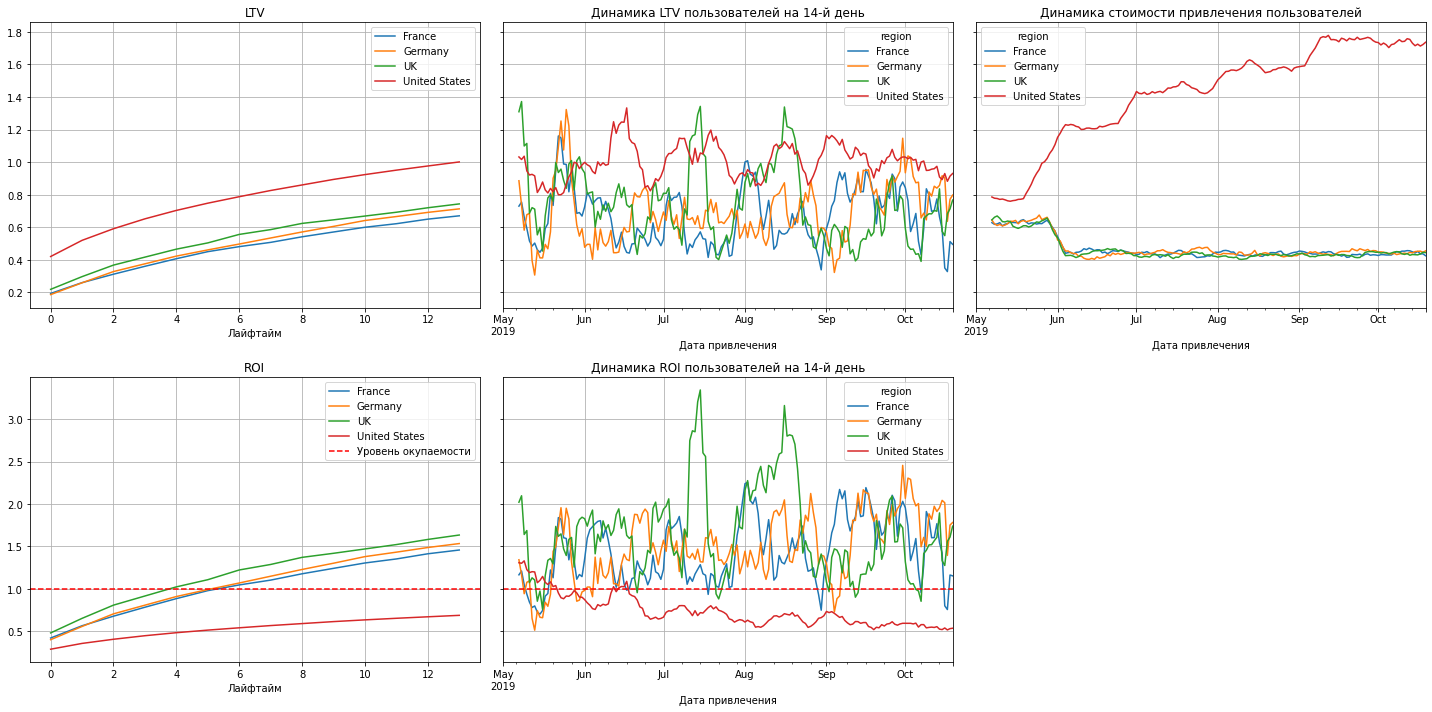

In [61]:
# построим графики динамики ltv, cac и roi с разбивкой по странам

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

ltv выше всего у пользователей из USA, меньше всего у пользователей из Франции.
В динамике ltv также выделяются пользователи из USA
Самую высокую стоимость привлечения показывают для пользователей из USA, показатель всегда выше всех стран и достигает 1.8 , у остальных стран не превышает 0.7 
Пользователи всех стран , кроме USA, выходят в окупаемость на четвертый и пятый дни. Из USA не окупаются совсем. В динамике окупаются также реклама для пользователей из всех стран, USA c июня уходит из зоны окупаемости. 

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [62]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_5, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

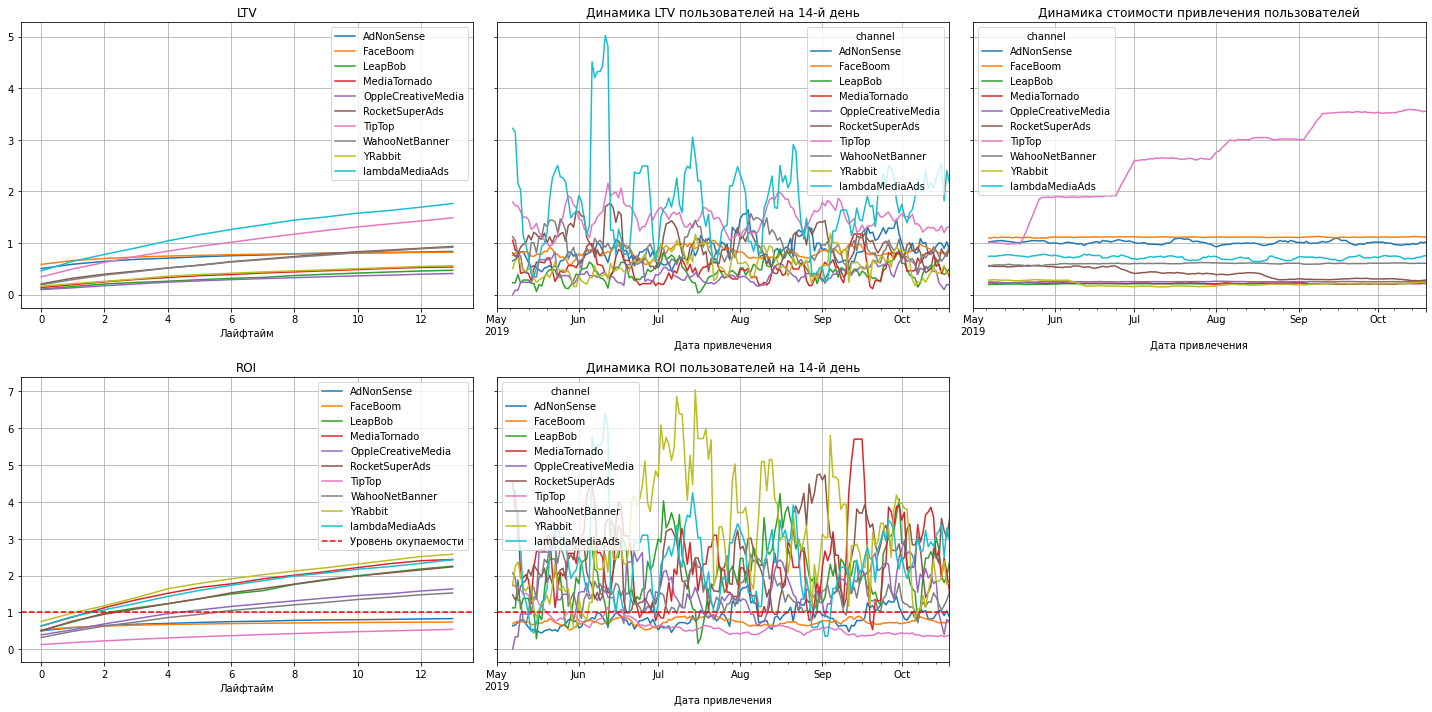

In [63]:
# построим графики динамики ltv, cac и roi с разбивкой по каналам

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

ltv выше всего у пользователей пришедших с каналов lambdaMediaAds и TipTop 
Cамая высокая стоимость привлечения у канала TipTop доходит до 3,5 
У остальных каналов стоимость привлечения не превышает 1.1
Совсем не окупаются каналы TipTop, FaceBoom, AdNonSense
Остальные каналы выходят в окупаемость в среднем с третьего дня 

В целом реклама для привлечения пользователей не окупается. 
Негативное влияние на окупаемость оказывает направление на пользователей с Mac и iPhone, проживающие в USA и пришедших по каналам TipTop, FaceBoom, AdNonSense. 
Проблемы окупаемости могут быть вызваны неправильным выбором маркетинговой стратегии, трата большого бюджета с нулевой окупаемостью 

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

* Было проведено исследование чтобы выявить проблемы окупаемости рекламы развлекательного приложения Procrastinate Pro+. Входные данные - данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы.
* В ходе исследования были изучены входные данные. Составлены профили пользователей. Определены минимальная и максимальная даты привлечения пользователей.
* Было изучено из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Больше всего пользователей приходят из USA, USA также и лидер по количеству платящих пользователей. Меньше всего пользователей из Германии, но количество платящих пользователей превосходит Англию и Францию. Самая меньшая доля платящих пользователей из Франции.
* Было определено какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи, а также рекламные источники привлечения и каналы, из которых пришло больше всего платящих пользователей. Больше всего пользователей предпочитают iPhone, доля платящих пользователей у Mac и iPhone в лидерах среди всех девайсов. Самое маленькое количество пользователей и доля платящих у PC. В лидерах каналы, из которых пришло больше всего платящих пользователей, FaceBoom, AdNonSense, LambdaMediaAds. Последнюю строчку по количеству привлеченых платящих пользователей занимает organic. 
* Посчитали общую сумму расходов на маркетинг. Общая сумма расходов на маркетинг составляет 105497. Выяснили, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник. Лидеры по тратам являются источники TipTop (54751), FaceBoom (32445). Меньше всего средств потратили на YRabbit (944). Построили визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Узнали, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Стоимость привлечения «органических» пользователей равна нулю, потому что они перешли в приложение самостоятельно, а не благодаря рекламе, что логично. У канала TipTop примерно раз в месяц увеличивался CAC в среднем на 1 или 0,5 доллара. Максимально сумма достигла с сентября 3,5 долларов. У остальных каналов в среднем не превышало расходы привлечение одного пользователя 1 доллар. 
* Проанализировали окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI. Проверили конверсию пользователей и динамику её изменения. То же самое сделали с удержанием пользователей. Построили и изучили графики конверсии и удержания. Проанализировали окупаемость рекламы с разбивкой по устройствам, странам, рекламным каналам.
* Исходя из исследования были выявлены причины неэффективности привлечения пользователей: неподходящий продукт для пользователей из USA. Неправильный выбор маркетинговой стратегии. 
* Рекомендации отделу маркетинга: исключить из рекламной аудитории пользователей с девайсами Mac, iPhone Либо перераспределить рекламный бюджет в пользу пользователей с другими девайсами. Ту же самую стратегию применить к пользователям из USA. Исключить каналы продвижения такие как TipTop, FaceBoom, AdNonSense, увеличить бюджет на каналы YRabbit, MediaTornado, LambdaMediaAds, RocketSuperAds. 